In [1]:
from citipy import citipy
import requests as r
import numpy as np
import json
import time
import matplotlib.pyplot as plt
from random import random, randint
import openweathermapy as ow
import pandas as pd

In [2]:
api_key = 'fd006e30478a34e544f081897dd4111c'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metrics'

In [3]:
query_url = url + 'appid=' + api_key + '&units=' + units + '&q='

In [4]:
random_cities = 500
lat_base = [((np.random.randint(-90, 90))) for _ in range (random_cities)]
long_base = [((np.random.randint(-180, 180))) for _ in range (random_cities)]
lat_long = tuple(zip(lat_base, long_base))

In [5]:
weather_data = []
cities = []
country = []

for lat,lon in lat_long:
    city = citipy.nearest_city(lat,lon)
    city_N = city.city_name
    cities.append(city_N)
    country.append(city.country_code)
    response = r.get(query_url + city_N).json()
    weather_data.append(response)

In [7]:
weather_df = pd.DataFrame({'Cities': cities,
              'Country': country, 'Latitude': lat_base, 'Longitude': long_base })
weather_df.head()

,Cities,Country,Latitude,Longitude
0,luganville,vu,-15,165
1,college,us,66,-149
2,kaitangata,nz,-62,173
3,klaksvik,fo,66,-3
4,bathsheba,bb,21,-48


In [8]:
tempature = []
humidity = []
cloudiness = []
wind_speed = []
for city in cities:
    weather_response = r.get(query_url + city_N).json()
    try:
        tempature.append(weather_response['main']['temp'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
    except:
        print("Skipping")

In [9]:
plotting_data = pd.DataFrame({"Temp": tempature, "Humidity": humidity, "Cdiness": cloudiness, "Speed of Wind": wind_speed})

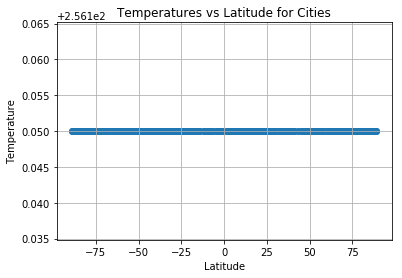

In [20]:
plt.scatter(weather_df["Latitude"], plotting_data["Temp"], marker="o")
plt.title("Temperatures vs Latitude for Cities")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Temperatures vs Latitude for Cities.png")

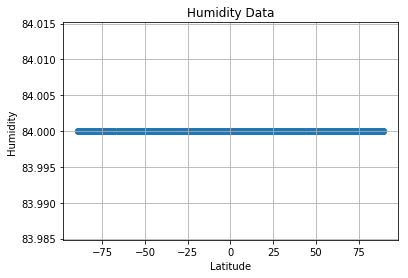

In [22]:
plt.scatter(weather_df["Latitude"], plotting_data["Humidity"], marker="o")
plt.title("Humidity Data")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Humidity Data.png")

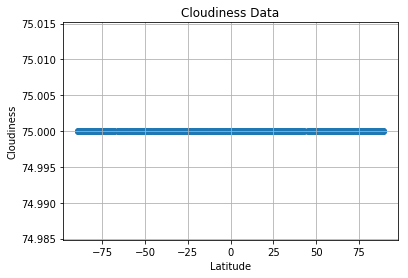

In [23]:
plt.scatter(weather_df["Latitude"], plotting_data["Cdiness"], marker="o")
plt.title("Cloudiness Data")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Cloudiness Data.png")

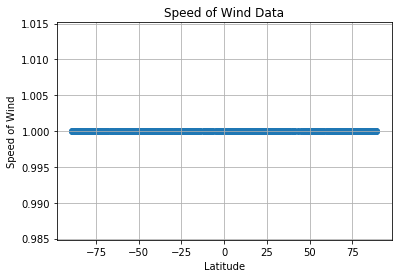

In [24]:
plt.scatter(weather_df["Latitude"], plotting_data["Speed of Wind"], marker="o")
plt.title("Speed of Wind Data")
plt.ylabel("Speed of Wind")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Speed of Wind Data.png")